# Visualisations

In [1]:
import sys
import time
import re
import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* We load the data from the Data Preparation Notebook.

In [2]:
merged_df = pd.read_csv('full.csv') # the whole data
gap_df = pd.read_csv('gap.csv')     # GAP citations
pac_df = pd.read_csv('pac.csv')     # GAP Packages citations

### Website

<AxesSubplot:title={'center':'Website statistics on the whole data'}, ylabel='Provided?'>

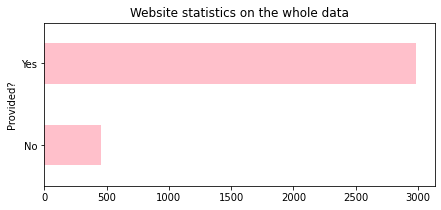

In [3]:
web_chart = merged_df['Website'].value_counts()
web_chart = web_chart.sort_values(ascending=True)
web_chart.plot(kind="barh", figsize=(7, 3), title='Website statistics on the whole data', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:ylabel='Website'>

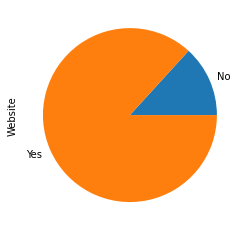

In [4]:
web_chart.plot(kind="pie")

<AxesSubplot:title={'center':'Website statistics on the Pure GAP data only'}, ylabel='Provided?'>

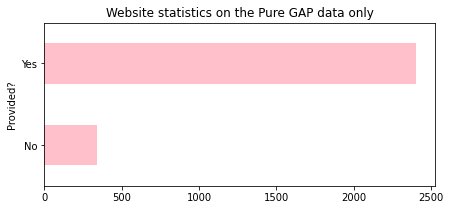

In [5]:
web_gap = gap_df['Website'].value_counts()
web_gap = web_gap.sort_values(ascending=True)
web_gap.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Pure GAP data only', 
                xlabel='Provided?', ylabel='Count', color='pink')

<AxesSubplot:title={'center':'Website statistics on the Package citation data'}, ylabel='Provided?'>

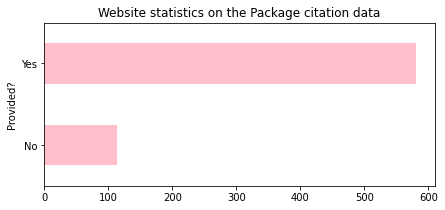

In [6]:
web_pac = pac_df['Website'].value_counts()
web_pac = web_pac.sort_values(ascending=True)
web_pac.plot(kind="barh", figsize=(7, 3), title='Website statistics on the Package citation data', 
                xlabel='Provided?', ylabel='Count', color='pink')

* Website statistics by Year

In [7]:
site_year = merged_df.groupby(['Website', 'Year'])['Year'].count().unstack('Website')
site_year_df = pd.DataFrame(data=site_year)
site_year_df

Website,No,Yes
Year,,
1992,1.0,NaN
1993,2.0,NaN
1994,1.0,NaN
1997,20.0,NaN
1998,14.0,2.0
1999,20.0,1.0
2000,45.0,16.0
2001,44.0,46.0
2002,30.0,37.0


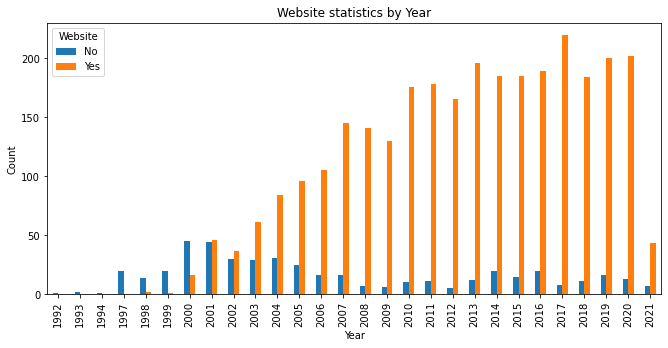

In [8]:
site_year_df.plot(kind="bar", subplots=False, figsize=(11, 5),
                  title='Website statistics by Year', 
                  xlabel='Year', ylabel='Count')
plt.show()

* We can see that in the beginning, up to 2000 the number of citations without a website reference was much higher. Then this trend reverses. On this barchart we can also observe the sharp increase of recorded citations altogether starting from 1997 and reaching a pique in 2017. 

from pandas.plotting import parallel_coordinates

parallel_coordinates(all_years, "Year")

### Lenght
* Most citations are around 110 characters long.

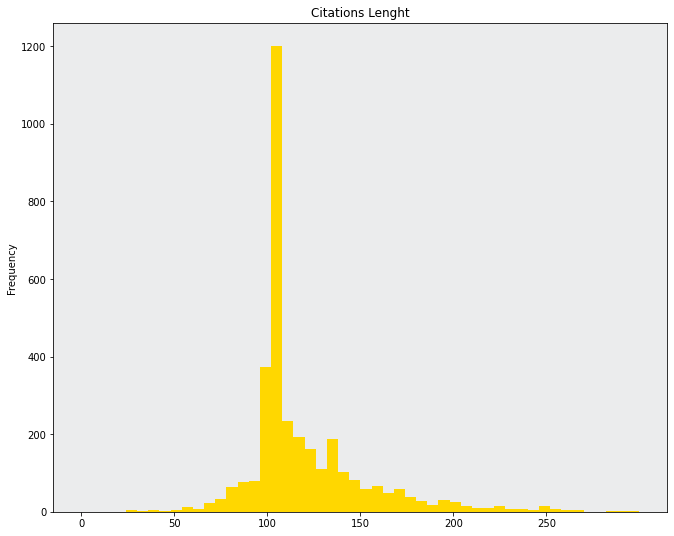

In [9]:
merged_df['Lentght'] = merged_df['Citation'].apply(len)
cit_len = merged_df['Lentght'].plot(kind='hist', bins=50, figsize=(11,9), stacked=True, 
                         xticks = range(0, 300, 50), 
                         range=(0, 300), 
                         color='gold', 
                         title='Citations Lenght', 
                         xlabel="lenght")
cit_len.set_facecolor('#ebeced')


year_df = merged_df.sort_values(by='Year', ascending=False)
year_df.dropna()
num = year_df['Journal'].count()
year_df.plot(x='Year', y=num, kind='barh')


### Version

<AxesSubplot:title={'center':'Top 35 most cited GAP versions'}, xlabel='Version', ylabel='Count'>

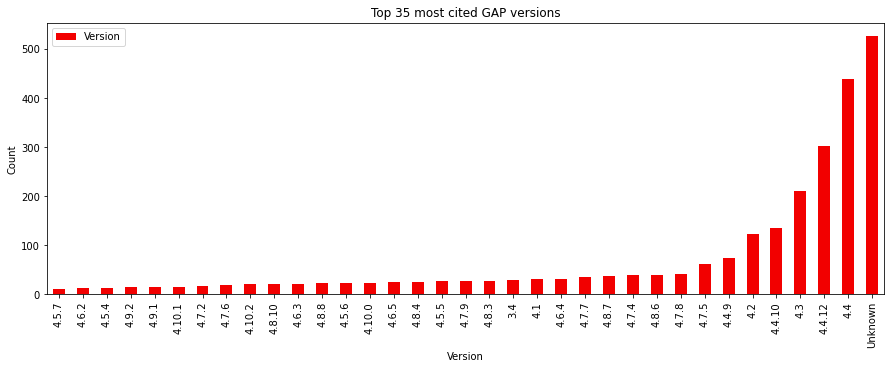

In [10]:
ver = gap_df['Version'].value_counts()
ver = ver.head(35)
ver = ver.to_frame()
ver = ver.sort_values(by='Version', ascending=True) # sort chrono. compare version numbers
ver = ver.dropna()
ver.plot(kind="bar", figsize=(15, 5), title='Top 35 most cited GAP versions', xlabel='Version', 
                ylabel='Count', color='#f20000')

* We can see that the most popular GAP versions cited are subversions of GAP 4, between 4.2 and 4.4

### Authors

* Top 20 authors citing GAP and its packages in their work.

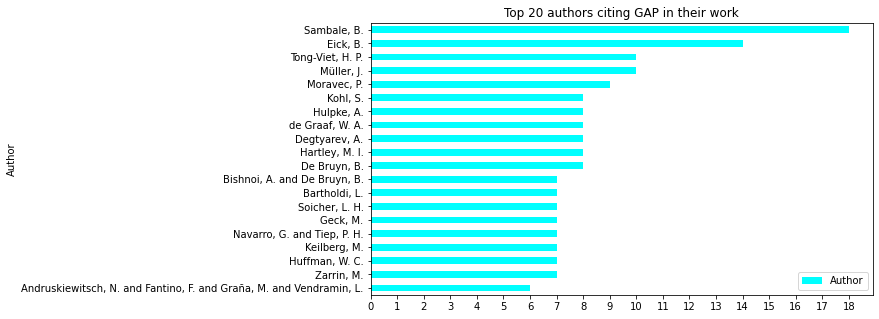

In [11]:
authors = gap_df['Author'].value_counts()
top = authors.head(20)
top = top.sort_values(ascending=True)
top = top.to_frame()
chart = top.plot(kind="barh",
                 figsize=(9,5), title='Top 20 authors citing GAP in their work', 
                 xlabel='Author', 
                 ylabel='Count', color='cyan', 
                  xticks=range(0, 19, 1))
# how do we treat joint papers ?

* Top 20 authors citing GAP Packages

In [12]:
author = pac_df['Author'].value_counts()
top20 = author.head(20)
top20 = top20.sort_values(ascending=False)
top20 = top20.to_frame()
top20

#chart = top20.plot(kind="bar",
#                 figsize=(9,5), title='Top 20 authors citing GAP Packages', 
#                 xlabel='Author', 
#                 ylabel='Count', color='brown', 
#                  xticks=range(0, 19, 1))

,Author
"Koshitani, S. and Müller, J. and Noeske, F.",10
"Bächle, A. and Margolis, L.",10
"Soicher, L. H.",8
"Eick, B.",7
"Kohl, S.",6
"Douglas, A. and Repka, J.",6
"Eick, B. and Horn, M.",6
"de Graaf, W. A.",5
"Dabbaghian-Abdoly, V.",5
"Cant, A. and Eick, B.",5


* Accuracy + site, ver, year
* Countries + to be provided
* GET function + simplicity is key

### Year

##### Barchart dislaying number of GAP citations per year.

* GAP citation counts for each year, sorted chronologically.

<AxesSubplot:title={'center':'Annual GAP citations data'}, xlabel='Year', ylabel='Count'>

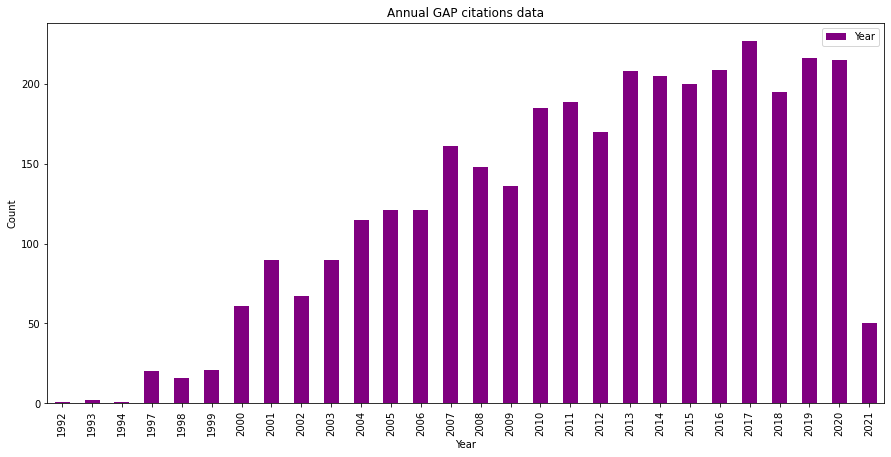

In [13]:
year_chrono = merged_df['Year'].value_counts()
chrono_df = year_chrono.to_frame()
chrono = chrono_df.sort_index()
chrono.plot(kind="bar", figsize=(15, 7), title='Annual GAP citations data', xlabel='Year', 
                ylabel='Count', color='purple')

### Top 20 journals citing GAP.

In [14]:
top_journals = gap_df['Journal'].value_counts()
top_20 = pd.DataFrame(top_journals.head(20))
top_20.reset_index()

,index,Journal
0,J. Algebra,380
1,Comm. Algebra,176
2,J. Symbolic Comput.,96
3,Discrete Math.,87
4,J. Algebra Appl.,85
5,J. Group Theory,69
6,Des. Codes Cryptogr.,59
7,Internat. J. Algebra Comput.,59
8,J. Pure Appl. Algebra,56
9,LMS J. Comput. Math.,46


Only for alternative, useful for copy/paste plain text - quick to load.
Try to allign on the left - journals.

In [15]:
headers = ['Journal name', 'GAP Citations count']
print(tabulate(top_20, headers = headers, tablefmt = 'pretty'))

NameError: name 'tabulate' is not defined

* Journals by year

In [ ]:
jou_year = merged_df.groupby(['Year'])['Journal'].count()
jou_year = pd.DataFrame(data=jou_year)
jou_year.head

### The most frequent type of work citing GAP: we can see that GAP is predominantly cited in articles - 2976 times.

In [ ]:
types_pub = pd.DataFrame(merged_df['Publication Type'].value_counts())
types_pub.columns = ['GAP Citations Count']
types_pub.index.names = ['Publication Type']
types_pub

### Accuracy

In [ ]:
acc = merged_df['Accuracy Score'].value_counts()
acc.plot(kind="pie", figsize=(15, 5), title='GAP citations Acuracy data', xlabel='Score', 
                ylabel='Count')

Trying to get average score per year by dividing the sum of scores to the number of citations for that year

* Annual average of Accuracy sores

In [ ]:
ttt = merged_df.groupby('Year')['Accuracy Score'].mean()
ttt = pd.DataFrame(data=ttt)
ttt.plot(kind='line', figsize=(13, 5), title='Annual average of Accuracy sores', xlabel='Year', 
                ylabel='Score', color='#34eb9b')

In [ ]:
df2 = gap_df.groupby(['Accuracy Score', 'Year'])['Accuracy Score'].mean().unstack('Year')
df2.plot()

### Releases by year

We will use `gap_df` containing only GAP citations with versions provided, all other entries such as Package citations are not needed.

In [ ]:
versions_cited = gap_df['Version'].unique()

In [ ]:
versions_cited

In [ ]:
release_dates = { 
    # dates from archive timestamps
    '4.8.2': 2016, # 2016/02/20
    '4.7.9': 2015, # 2015/11/29
    '4.7.8': 2015, # 2015/06/09
    '4.7.7': 2015, # 2015/02/13
    '4.7.6': 2014, # 2014/11/15
    '4.7.5': 2014, # 2014/05/24
    '4.7.4': 2014, # 2014/02/20
    '4.7.3': 2013, # 2014/02/15
    '4.7.2': 2013, # 2013/12/01
    '4.7': 2013,
    '4.6.5': 2013, # 2013/07/20
    '4.6.4': 2013, # 2013/05/04
    '4.6.3': 2013, # 2013/03/18
    '4.6.2': 2013, # 2013/02/02
    '4.5.7': 2012, # 2012/12/14
    '4.5.6': 2012, # 2012/09/16
    '4.5.5': 2012, # 2012/07/16
    '4.5.4': 2012, # 2013/06/04
    '4.5': 2012, 
    # dates below from file creation
    '4.4.12': 2008, # 2008/12/16
    '4.4.11': 2008, # 2008/12/08
    '4.4.10': 2007, # 2007/10/05
    '4.4.9': 2006,  # 2006/11/02
    '4.4.8': 2006,  # 2006/09/29
    '4.4.7': 2006,  # 2006/03/17
    '4.4.6': 2005,  # 2005/09/02
    '4.4.5': 2005,  # 2005/05/13
    '4.4.4': 2004,  # 2004/12/22
    # dates below from http://www.gap-system.org/Download/Updates/index.html
    '4.4.3': 2004,   # May 2004
    '4.4.2': 2004,  # April 2004
    # dates from http://www.gap-system.org/Doc/History/history.html
    # if not stated otherwise
    '4.4': 2004, 
    '4.3': 2002, 
    '4.2': 2000, # http://www.gap-system.org/ForumArchive/Linton.1/Steve.1/Release_.3/1.html
    '4.1': 1999, 
    '3.4': 1997, # assume http://www.gap-system.org/Doc/History/preface_3.4.4.html
}

In [ ]:
release_dates.keys()

In [ ]:
def release_year(version):
    if version in release_dates.keys():
        return release_dates[version]
    else:
        return 'Unknown'

In [ ]:
release_year('3.4')

In [ ]:
gap_df['ReleaseYear'] = gap_df['Version'].map(release_year)

In [ ]:
data = gap_df['ReleaseYear'].value_counts()

* Number of Citations by year of cited GAP release, in textual and graphic forms.

In [ ]:
data

In [ ]:
data.loc[sorted(data.index.intersection(range(1997, 2021)))].plot(kind="bar", 
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

all_years = corpus_df.groupby(['year','ReleaseYear'])['Year'].count()
all_years

In [ ]:
years = gap_df['Year'].unique()
dat = gap_df['Year'].value_counts()
g = gap_df['Version'].value_counts()
ver = gap_df['Version'].unique()

In [ ]:
gap_df['Publication Type'].value_counts()

In [ ]:
yea = gap_df.groupby(['Publication Type', 'Year'])['Publication Type'].count()
yea = pd.DataFrame(data=yea)
yea

In [ ]:
yea.plot(kind="bar", subplots=True,  
                figsize=(11, 5), title='Citations by year of cited GAP release', xlabel='Years', 
                ylabel='Count', color='green')

In [ ]:
jou = gap_df.groupby('Year')['Journal'].unique()
jou = pd.DataFrame(data=jou)
jou

In [ ]:
lee = gap_df.groupby('Lentght')
lee.size()

In [ ]:
au7 = gap_df['Author'].unique()
au7

# Column `delay` = release year - year ???

In [ ]:
gap_df[gap_df['ReleaseYear'] != 'Unknown']

In [ ]:
def set_delay(series):
    rel_year = series['ReleaseYear']
    year = series['Year']
    delay = series['Delay']
    if rel_year != 'Unknown':
        #print('***Package***:')
        delay = year - rel_year
    return delay

In [ ]:
gap_df['Delay'] = gap_df.apply(set_delay, axis=1)

* Delay in picking up new GAP releases

In [ ]:
tail = gap_df['Delay'].value_counts()
tail = pd.DataFrame(data=tail)
tail = tail.sort_index(ascending=False)
tail

In [ ]:
gap_df.loc[gap_df['Delay'] < 0]

In [ ]:
tail.plot(kind="bar", subplots=True,  
                figsize=(11, 5), title='Delay in picking up new GAP releases', xlabel='Delay in years', 
                ylabel='Count', color='#fa00d9')
plt.show()

In [ ]:
df2 = gap_df.groupby(['Year', 'ReleaseYear'])['ReleaseYear'].count().unstack('Year').fillna(0)
df2.head(11)

#objects = gap_df['Year']

plt.bar(lee, years, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Programming language usage')

plt.show()

In [ ]:
gap_df

In [ ]:
top_medians = gap_df[gap_df["Accuracy Score"] > 2].sort_values("Accuracy Score")
top_medians.plot(x='Year', y='Lenght', kind='bar')

In [ ]:
med = gap_df.groupby(['Lenght'])
#med = med.sort_values(by='Lenght', ascending=False)
med

In [ ]:
plt.plot(top_medians["Year"], top_medians["Lenght"].sum())

# Interactive

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline
import cufflinks as cf

* Filter the citations data by year

In [ ]:
years_list = gap_df['Year'].unique()
years_list

In [ ]:
# Interact with specification of arguments
@interact
def show_articles_more_than(Year=years_list, 
                            operator=['Up to', 'For this year', 'After']):
    column='Year'
    if operator == 'For this year':
        return gap_df.loc[gap_df[column] == Year]
    if operator == 'Up to':
        return gap_df.loc[gap_df[column] <= Year]
    if operator == 'After':
        return gap_df.loc[gap_df[column] > Year]

In [ ]:
# Interact with specification of arguments
@interact
def show_articles_more_than(column=['Year', 'Accuracy Score', 'Lenght'], 
                            x=(1, 3000, 1)):
    return gap_df.loc[gap_df[column] > x]

Versions / year
top authors / year
data per year

In [ ]:
def get_info(db, food, nutrient):
    food_info = db
    for word in food.split():
        food_info = food_info[food_info['Food'].str.contains(word, case=False)]
    nutritional_info = food_info[food_info['Nutrient'] == nutrient]
    return nutritional_info

interact(lambda food, nutrient: get_info(db, food, nutrient),
        food='',
        nutrient=list(db['Nutrient'].unique()))

In [ ]:
def get_info(db, author, citation):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    cit_info = auth_info[auth_info['Citation'] == citation]
    return cit_info

interact(lambda author, citation: get_info(gap_df, author, citation),
        author = '',
        citation = list(gap_df['Citation'].unique()))

In [ ]:
def get_aut(db, author):
    auth_info = db
    for word in author.split():
        auth_info = auth_info[auth_info['Author'].str.contains(word, case=False)]
    return auth_info


interact(get_aut(merged_df, author), author = '')

In [ ]:
yeaaa = widgets.FloatSlider(min=min(gap_df['Year']), max=max(gap_df['Year']), step=1, description='Year')
display(yea)

In [ ]:
import ipywidgets as widgets
from IPython.display import display




%matplotlib nbagg

x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    
    ax.clear()
    y = amp * np.sin(freq * 2 * np.pi * x + phase * 2 * np.pi)
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$'
    
    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')
    
widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

In [ ]:
t=pd.DataFrame({'string':['i live here','you live in eltham','machine learning','learning english','go home','go back','live home'],
                'number':[1,3,2,3,1,2,4],
                'word':['a','haha','runing over there','abcdefg','aaa','bye','hou']})

def myFUN_searchString(value,string):
    s=string.split(' ')
    return value in s

def myFUN_search(value):
    t.loc[:,'Flag']=''
    t.loc[:,'Flag']=[myFUN_searchString(value,x) for x in t.loc[:,'string']]
    return t.loc[:,'Flag']

keyword=widgets.Text(
    value='electricity',
    placeholder='Type something',
    description='keyword:',
    disabled=False
)
display(keyword)


button = widgets.Button(description="search")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(b):
    t.loc[:,'Flag']=myFUN_search(keyword.value)
    t1=t.loc[(t['Flag'])]
    t1.drop(['Flag'],axis=1,inplace=True)
    t1.reset_index(drop=True,inplace=True)
    if t1.shape[0]>30:
        t1=t1.loc[0:30]

    display(t1)

button.on_click(on_button_clicked)
display(output)